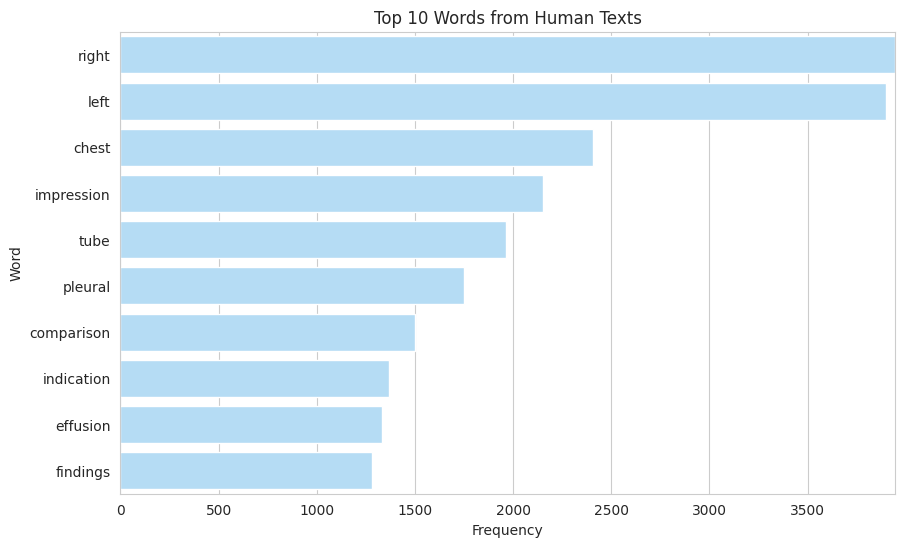

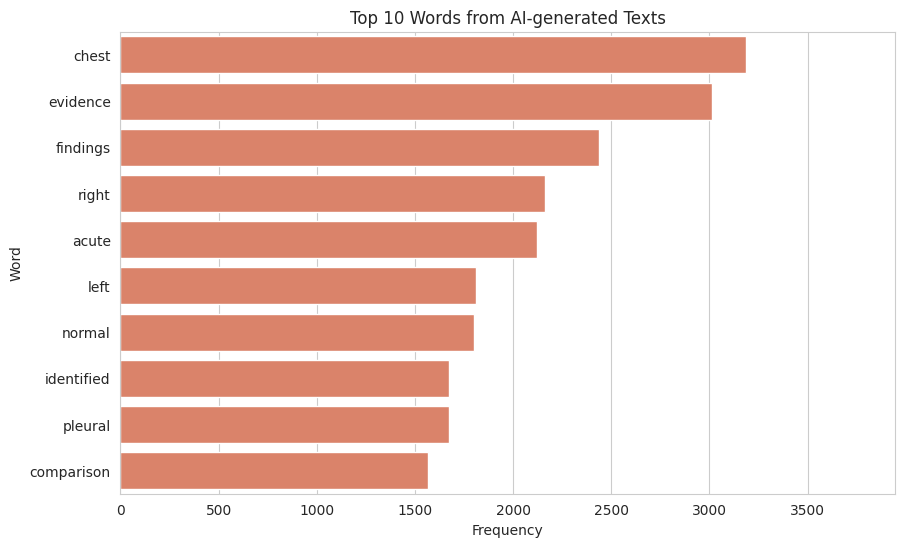

In [6]:
import pandas as pd
import numpy as np
import random
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_sm')

def get_top_words(texts):
    all_words = []
    for text in texts:
        doc = nlp(text)
        tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        all_words.extend(tokens)

    word_freq = Counter(all_words)
    top_words = dict(word_freq.most_common(10))
    return top_words

def compare_texts(human_texts, ai_texts):

    human_top_words = get_top_words(human_texts)
    ai_top_words = get_top_words(ai_texts)
    max_freq = max(max(human_top_words.values()), max(ai_top_words.values()))

    sns.set_style("whitegrid")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(human_top_words.values()), y=list(human_top_words.keys()), color='#aadfff')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title('Top 10 Words from Human Texts')
    plt.xlim(0, max_freq)
    plt.savefig("top10_human.png", dpi=300, bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(ai_top_words.values()), y=list(ai_top_words.keys()), color='#ed7857')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title('Top 10 Words from AI-generated Texts')
    plt.xlim(0, max_freq)
    plt.savefig("top10_ai.png", dpi=300, bbox_inches="tight")
    plt.show()

data = pd.read_csv('all_data.csv')
human_texts = data[data.labels == 0]['text'].values
ai_texts = data[data.labels == 1]['text'].values

random.seed(3)
ai_texts = random.sample(list(ai_texts), len(human_texts))

compare_texts(human_texts, ai_texts)